# 텐서플로우를 이용한 분류분석

In [1]:
import tensorflow as tf    # 구글이 제공하는 인공지능 관련 함수가 제공되는 텐서2.0으로 세팅
import pandas as pd    #행열로 구성되어 있는 데이터베이스 자료를 처리하는 모듈
import matplotlib.pyplot as plt   # 차트제공하는 모듈

In [2]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [4]:
import pandas as pd
df = pd.read_excel('타이타닉/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## [문제] 사이킷런 Label Encoding을 이용하여 성별을 0, 1로 변경함
![image.png](attachment:image.png)

In [6]:
## 성별변경
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
labelen.fit_transform(df['sex'])  # f= 0, m=1

df['sex'] = [0 if x == 'femail' else 1 for x in df['sex']]

In [7]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


## [문제] 데이터 type float64=> float32로 변경 
## [문제]age,sibsp,parch,fare Null값 제거


In [9]:
# 데이터 타입 변경
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


In [10]:
list_=['pclass', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'age']
for x in list_:
  df[x] = df[x].astype('float32')
  # age,sibsp,parch,fare Null값 제거
  df = df[df[x].notnull()]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float32
 1   survived   1045 non-null   float32
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float32
 4   age        1045 non-null   float32
 5   sibsp      1045 non-null   float32
 6   parch      1045 non-null   float32
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float32
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float32(7), float64(1), object(6)
memory usage: 93.9+ KB


## x,y 데이터 분할

In [12]:
y = df['survived'].values  
x = df.values[:, [0,3,4,5,6,8]]  

#x = mushrooms.drop(['class'], axis=1) #axis는 열 드롭, 생략시 행 드롭
#x = mushrooms.drop(['class'], axis=1).values로  numpy형식으로 보내도됨
print(y[:5])   #class를 y값으로
print(x[:5])   #class를 뺀 나머지를 x값으로 잡음. 


[1. 1. 0. 0. 0.]
[[1.0 1.0 29.0 0.0 0.0 211.33749389648438]
 [1.0 1.0 0.916700005531311 1.0 2.0 151.5500030517578]
 [1.0 1.0 2.0 1.0 2.0 151.5500030517578]
 [1.0 1.0 30.0 1.0 2.0 151.5500030517578]
 [1.0 1.0 25.0 1.0 2.0 151.5500030517578]]


(array([618.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

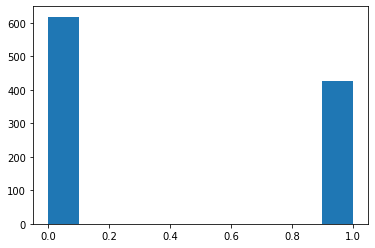

In [13]:
plt.hist(y) # 데이터 불균형 확인

# x, y값 변환
- 아래와 같은 에러 대처법
- ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [15]:
import numpy as np
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)

### x 값을 scailing 할 경우더 잘나옴

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x2 = std_scaler.fit(x)

# 에러

## 트레이닝 테스트 데이터 나누기

In [51]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [39]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((836, 6), (209, 6), (836,), (209,))

# 문제_ 모델 제작

In [40]:
### 타이타닉 데이터의 x 값은(첫 layer의 input_shape임)
### 타이타닉 데이터의 y 값은 (최종 레이어)
# 선형회귀, 출력값1, 활성화함수 없음
# 이항분류, 출력값1, 활성화함수 sigmoid
# 이항분류를 원핫 인코딩시키면 출력값 2, 활성화함수 softmax
# 다항분류는 원핫인코딩해서 해야함, 다항분류갯수, 활성화함수 softmax

In [41]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=1000, activation="relu", input_shape=(6,)),  # = x_train 정보 입력
                           tf.keras.layers. Dense(units=100, activation="relu"),
                           tf.keras.layers. Dense(units=1, activation="sigmoid")                  # = y_train 정보 입력
])

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='binary_crossentropy', metrics=['acc']) #loss = binary_crossentropy를 권장함

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
model.summary()

#문제 Param의 출력된 갯수를 계산하여 보세요
# (input+b) * w
# layer1 = (6+1)*40 => 280
# layer2 = (40+1)*5 => 205
# layer3 = (5+1)*1 => 6

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              7000      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 107,201
Trainable params: 107,201
Non-trainable params: 0
_________________________________________________________________


In [44]:
#다른 신경망 네트워크들과 비슷하게 훈련은 fit메소드를 통해 실행하며, 
# EarlyStopping이라는 callback 함수를 사용하여 val_loss가 3번 이상 연속으로 증가한다면 멈추고 
# 최저의 loss를 사용하도록 선언함

history = model.fit(x_train, y_train, epochs=25, batch_size=1, validation_split=0.25, #validation_split 검증데이터 비율
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


Epoch 1/25
627/627 [==============================] - 2s 3ms/step - loss: 10.5791 - acc: 0.5901 - val_loss: 0.6795 - val_acc: 0.5885
Epoch 2/25
627/627 [==============================] - 2s 3ms/step - loss: 0.6894 - acc: 0.5949 - val_loss: 0.6800 - val_acc: 0.5885
Epoch 3/25
627/627 [==============================] - 2s 3ms/step - loss: 0.6821 - acc: 0.5758 - val_loss: 0.6785 - val_acc: 0.5885
Epoch 4/25
627/627 [==============================] - 2s 3ms/step - loss: 0.6826 - acc: 0.5853 - val_loss: 0.6797 - val_acc: 0.5885
Epoch 5/25
627/627 [==============================] - 2s 3ms/step - loss: 0.6806 - acc: 0.5901 - val_loss: 0.6795 - val_acc: 0.5885
Epoch 6/25
627/627 [==============================] - 2s 3ms/step - loss: 0.6831 - acc: 0.5805 - val_loss: 0.6786 - val_acc: 0.5885


<Figure size 864x288 with 0 Axes>

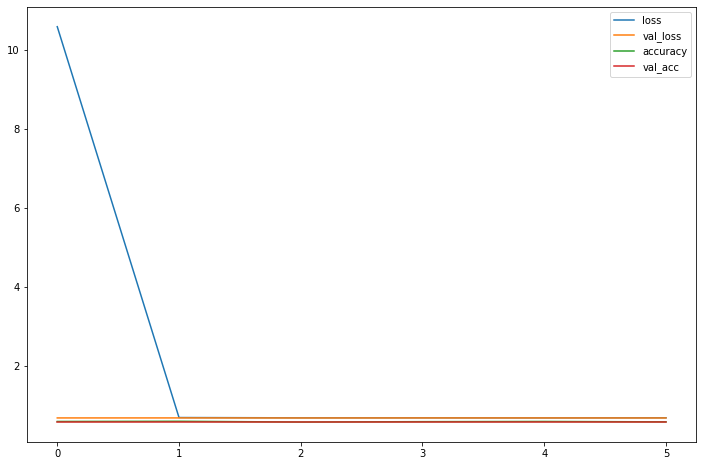

In [45]:
plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()


In [46]:
# # 모델 측정
model.evaluate(x_test,y_test)
# 손실값, 정확도

7/7 [==============================] - 0s 4ms/step - loss: 0.6821 - acc: 0.5742


[0.6820694804191589, 0.5741626620292664]

In [25]:
# 400 40 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.6853 - acc: 0.5742
# [0.6853247284889221, 0.5741626620292664]

# 400 10 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.7009 - acc: 0.5742
# [0.700901985168457, 0.5741626620292664]

# 10 5 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.7136 - acc: 0.5742
# [0.7136191725730896, 0.5741626620292664]

# 1000 5 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.6833 - acc: 0.5742
# [0.6833485960960388, 0.5741626620292664]

# 100000 5 1
# 7/7 [==============================] - 0s 5ms/step - loss: 0.6877 - acc: 0.5742
# [0.6877029538154602, 0.5741626620292664]

# 1000 10 1
# 7/7 [==============================] - 0s 4ms/step - loss: 0.7187 - acc: 0.5742
# [0.7187359929084778, 0.5741626620292664]

# 1000 100 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.6821 - acc: 0.5742
# [0.6821135878562927, 0.5741626620292664]

# 1000 100 10 1
# 7/7 [==============================] - 0s 4ms/step - loss: 0.7045 - acc: 0.5742
# [0.7044703364372253, 0.5741626620292664]

# 1000 3 1
# 7/7 [==============================] - 0s 3ms/step - loss: 0.6829 - acc: 0.5742
# [0.682886004447937, 0.5741626620292664] 

In [47]:
# 모델 예측, 아래의 x0~x8의 데이터를 newX값으로 받아서 예측하여 봅니다.
x0_pclass=5
x3_sex=1
x4_age=20
x5_sibsp=2
x6_parch=2
x8_fate=2
newX = [[x0_pclass, x3_sex, x4_age, x5_sibsp, x6_parch, x8_fate]]
model.predict(newX)

array([[0.42699456]], dtype=float32)

In [48]:
print(np.shape(x_test[0]))

print(np.shape(x_test[0:1]))

(6,)
(1, 6)


In [49]:
model.predict(x_test[0:1])

array([[0.42699456]], dtype=float32)

In [33]:
# 타이타닉 h5모델로 저장
model.save('my_ti.h5')
# 모델 저장되면 이모델만 갖고 가면 됨

In [35]:
# 새파일에서 로드시
import tensorflow as tf
load_model = tf.keras.models.load_model('my_ti.h5')

In [36]:
load_model.predict(newX)

array([[0.3213936]], dtype=float32)